## Part 1: A discrete-time model
### Task 1


Proportion of women with local recurrence:0.712


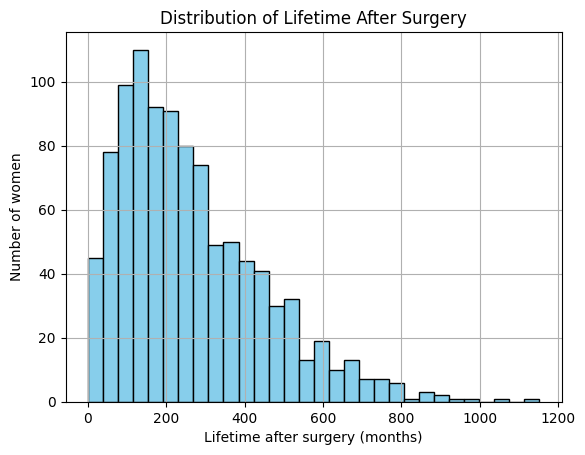

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation 

P = np.array([
    [0.9915, 0.005, 0.0025, 0.0, 0.001],
    [0.0, 0.986, 0.005, 0.004, 0.005],
    [0.0, 0.0, 0.992, 0.003, 0.005],
    [0.0, 0.0, 0.0, 0.991, 0.009],
    [0.0, 0.0, 0.0, 0.0, 1.0]
])

def simulate_woman_lifetime(n_women, prob_matrix = P, lifetime_at_t = 120):
    lifetimes = []
    local_recurrence_flags = []
    states_at_t = []

    for i in range(n_women):
        state = 0
        lifetime = 0
        local_recurrence = False
        state_at_t_recorded = False

        while state !=4:
            lifetime += 1
            state = np.random.choice(5, p=P[state])
            if state in [1, 3]:
                local_recurrence = True
            if lifetime == lifetime_at_t:
                states_at_t.append(state + 1)
                state_at_t_recorded = True

        if not state_at_t_recorded:
            states_at_t.append(5)

        lifetimes.append(lifetime)
        local_recurrence_flags.append(local_recurrence)
    return lifetimes, local_recurrence_flags, states_at_t

n_women = 1000
lifetimes, local_recurrence_flags, states_at_120 = simulate_woman_lifetime(n_women)


# Satistics
prop_local_recurrence = np.mean(local_recurrence_flags)
print(f'Proportion of women with local recurrence:{prop_local_recurrence}')

plt.hist(lifetimes, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Lifetime after surgery (months)')
plt.ylabel('Number of women')
plt.title('Distribution of Lifetime After Surgery')
plt.grid(True)
plt.show()

### Task 2

Empirical distribution at t=120: [0.364 0.165 0.167 0.069 0.235]
Theoretical distribution at t=120: [0.35902627 0.15895604 0.1660869  0.06774149 0.2481893 ]
Chi-squared statistic: 1.0280193535534756
P-value: 0.9055179937377933


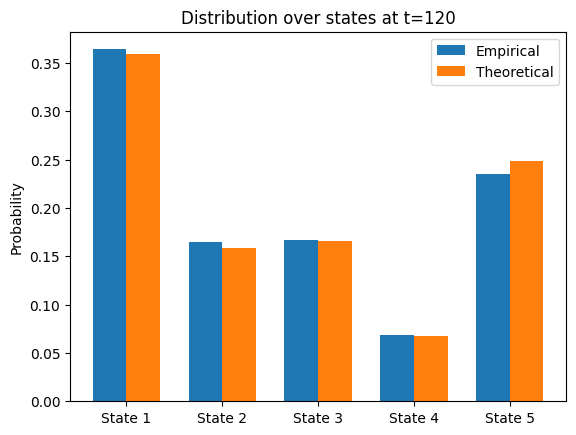

In [13]:
from scipy.stats import chisquare
import collections

# Empirical distribution at t=120
counts_empirical = collections.Counter(states_at_120)
total = sum(counts_empirical.values())
empirical_pt = np.array([counts_empirical.get(i, 0) / total for i in range(1, 6)])
print("Empirical distribution at t=120:", empirical_pt)

# Theoretical distribution at t=120
p0 = np.array([1, 0, 0, 0, 0])
P_120 = np.linalg.matrix_power(P, 120)
exact_pt = p0 @ P_120
print("Theoretical distribution at t=120:", exact_pt)

# Convert empirical to counts for chi-squared
observed_counts = np.array([counts_empirical.get(i, 0) for i in range(1, 6)])
expected_counts = exact_pt * total
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")


# Plot to compare empirical vs theoretical distributions at t=120
states = ['State 1', 'State 2', 'State 3', 'State 4', 'State 5']
x = np.arange(len(states))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, empirical_pt, width, label='Empirical')
rects2 = ax.bar(x + width/2, exact_pt, width, label='Theoretical')
ax.set_ylabel('Probability')
ax.set_title('Distribution over states at t=120')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()
plt.show()

### Task 3

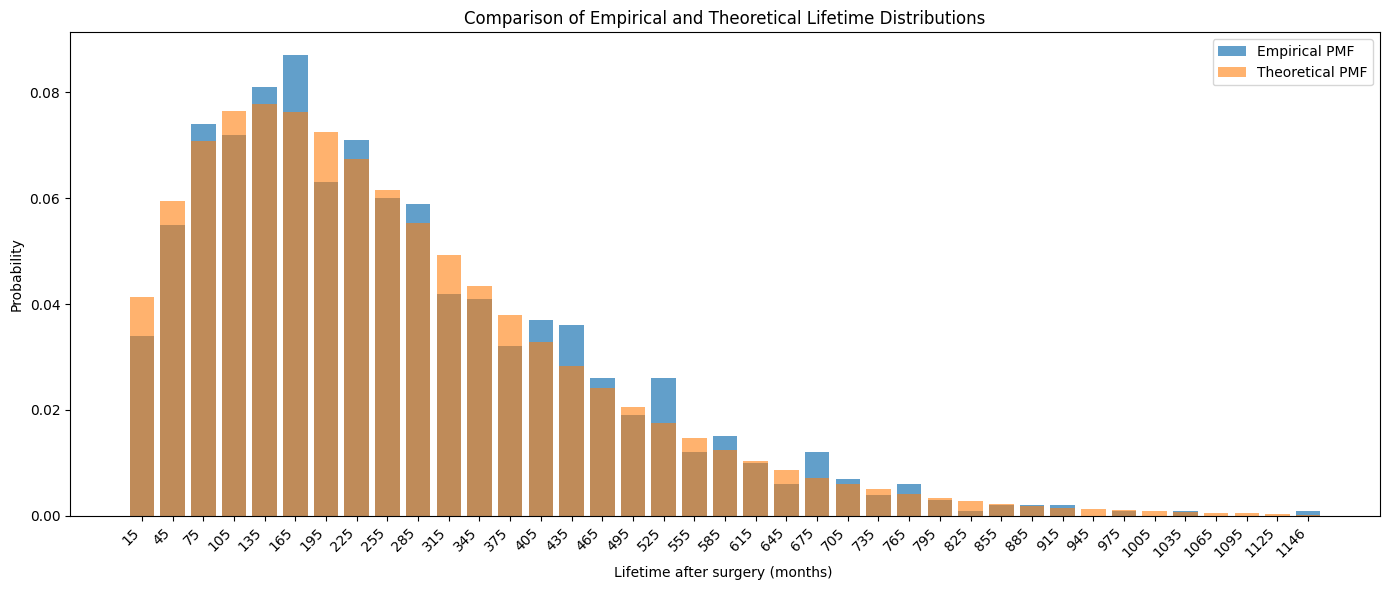

Chi-square statistic: 32.54359436462477
P-value: 0.7194207090305105


In [14]:
# Compute theoretical PMF
Ps = P[:4, :4]
ps = P[:4, 4].reshape(-1, 1)
pi = np.array([1, 0, 0, 0]).reshape(1, -1)
max_lifetime = max(lifetimes)
theoretical_pmf = []

for t in range(1, max_lifetime+1):
    val = pi @ np.linalg.matrix_power(Ps, t-1) @ ps
    theoretical_pmf.append(val[0,0])

theoretical_pmf = np.array(theoretical_pmf)

# Empirical histogram
counts_lifetimes = np.bincount(lifetimes)
counts_lifetimes = counts_lifetimes[1:max_lifetime+1]
empirical_pmf = counts_lifetimes / sum(counts_lifetimes)


# Histogram plot to compare
bin_size = 30
length = len(empirical_pmf)
n_bins = (length + bin_size - 1) // bin_size

grouped_empirical = np.zeros(n_bins)
grouped_theoretical = np.zeros(n_bins)

for i in range(n_bins):
    start = i * bin_size
    end = min((i + 1) * bin_size, length)
    grouped_empirical[i] = empirical_pmf[start:end].sum()
    grouped_theoretical[i] = theoretical_pmf[start:end].sum()

# Bin Labels
bins_range = range(1, max_lifetime + 1, bin_size)
bin_centers = [start + (min(start + bin_size - 1, max_lifetime) - start) // 2 for start in bins_range]
bin_labels = [str(center) for center in bin_centers]
x_pos = np.arange(len(bin_labels))


plt.figure(figsize=(14, 6))
plt.bar(x_pos, grouped_empirical, alpha=0.7, label='Empirical PMF')
plt.bar(x_pos, grouped_theoretical, alpha=0.6, label='Theoretical PMF')

plt.xticks(x_pos, bin_labels, rotation=45, ha='right')
plt.xlabel(f'Lifetime after surgery (months) ')
plt.ylabel('Probability')
plt.title('Comparison of Empirical and Theoretical Lifetime Distributions')
plt.legend()
plt.tight_layout()
plt.show()

# Chi-square test
grouped_counts = np.zeros(n_bins)
for i in range(n_bins):
    start = i * bin_size
    end = min((i + 1) * bin_size, length)
    grouped_counts[i] = counts_lifetimes[start:end].sum()

grouped_theoretical = grouped_theoretical / grouped_theoretical.sum()
expected_counts = grouped_theoretical * 1_000

chi2_stat, p_value = chisquare(f_obs=grouped_counts, f_exp=expected_counts)
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

### Task 4

Simulated: 18373, Accepted: 1000
Expected lifetime (conditioned): 173.52 months
Standard deviation: 152.15 months


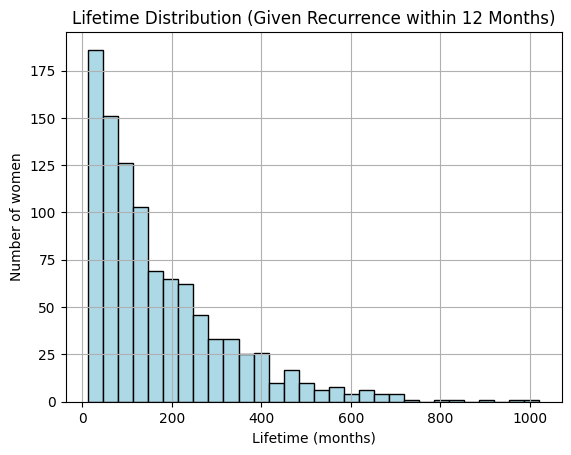

In [18]:
def simulate_conditioned_lifetime(target_n, prob_matrix=P):
    accepted_lifetimes = []
    count = 0

    while len(accepted_lifetimes) < target_n:
        state = 0
        lifetime = 0
        local_or_distant_in_12m = False
        survived_12_months = False

        history = []

        while state != 4:
            lifetime += 1
            state = np.random.choice(5, p=prob_matrix[state])
            history.append(state)

            # Check recurrence within first 12 months
            if lifetime <= 12 and state in [1, 3]:  # Local or distant recurrence
                local_or_distant_in_12m = True

            if lifetime == 12 and state != 4:
                survived_12_months = True

        if survived_12_months and local_or_distant_in_12m:
            accepted_lifetimes.append(lifetime)

        count += 1
    
    print(f"Simulated: {count}, Accepted: {len(accepted_lifetimes)}")

    return np.array(accepted_lifetimes)

# Run simulation to get 1000 valid samples
np.random.seed(42)
conditioned_lifetimes = simulate_conditioned_lifetime(1000)

# Summary statistics
mean_lifetime = np.mean(conditioned_lifetimes)
std_lifetime = np.std(conditioned_lifetimes)

print(f"Expected lifetime (conditioned): {mean_lifetime:.2f} months")
print(f"Standard deviation: {std_lifetime:.2f} months")

# Plot histogram
plt.hist(conditioned_lifetimes, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Lifetime (months)')
plt.ylabel('Number of women')
plt.title('Lifetime Distribution (Given Recurrence within 12 Months)')
plt.grid(True)
plt.show()

### Task 5

Crude Monte Carlo estimate:
  Mean = 0.7375
  Variance = 0.001301

Control Variates estimate:
  Mean = 0.7376
  Variance = 0.000309

Variance reduction: 76.25%


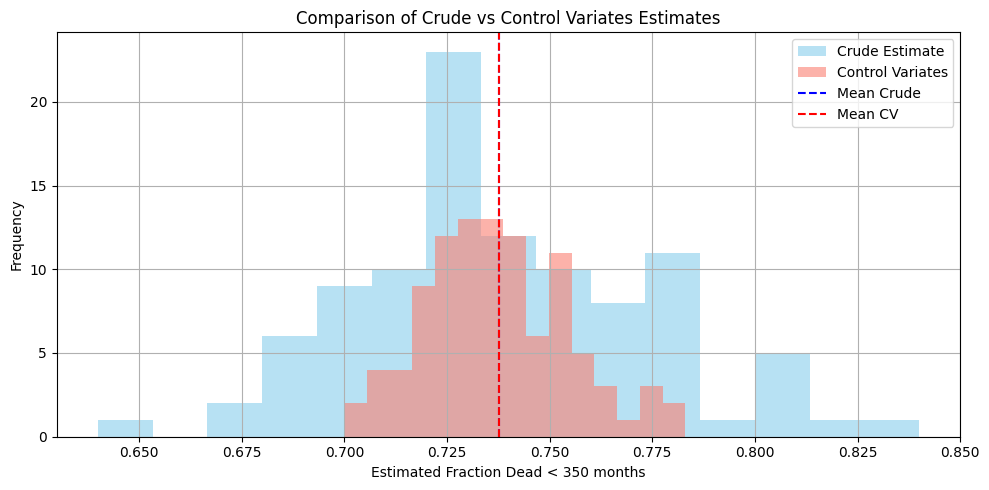

In [20]:
n_simulations = 100
n_women_per_sim = 200
threshold = 350
np.random.seed(42)

# Arrays to store results
fractions_crude = []
mean_lifetimes = []

# Simulation loop
for _ in range(n_simulations):
    lifetimes, _, _ = simulate_woman_lifetime(n_women_per_sim)
    
    fraction_dead = np.mean(np.array(lifetimes) <= threshold)
    mean_lifetime = np.mean(lifetimes)

    fractions_crude.append(fraction_dead)
    mean_lifetimes.append(mean_lifetime)

fractions_crude = np.array(fractions_crude)
mean_lifetimes = np.array(mean_lifetimes)

# Compute crude mean and variance
mean_crude = np.mean(fractions_crude)
var_crude = np.var(fractions_crude, ddof=1)

print(f"Crude Monte Carlo estimate:")
print(f"  Mean = {mean_crude:.4f}")
print(f"  Variance = {var_crude:.6f}")

# Control variate adjustment
mu_Y = np.mean(mean_lifetimes)
cov_XY = np.cov(fractions_crude, mean_lifetimes, ddof=1)[0, 1]
var_Y = np.var(mean_lifetimes, ddof=1)
lambda_star = cov_XY / var_Y

fractions_cv = fractions_crude + lambda_star * (mu_Y - mean_lifetimes)

# Statistics with control variate
mean_cv = np.mean(fractions_cv)
var_cv = np.var(fractions_cv, ddof=1)

print("\nControl Variates estimate:")
print(f"  Mean = {mean_cv:.4f}")
print(f"  Variance = {var_cv:.6f}")

# Reduction in variance
reduction = 100 * (var_crude - var_cv) / var_crude
print(f"\nVariance reduction: {reduction:.2f}%")

# Plotting comparison
plt.figure(figsize=(10, 5))
plt.hist(fractions_crude, bins=15, alpha=0.6, label='Crude Estimate', color='skyblue')
plt.hist(fractions_cv, bins=15, alpha=0.6, label='Control Variates', color='salmon')
plt.axvline(mean_crude, color='blue', linestyle='--', label='Mean Crude')
plt.axvline(mean_cv, color='red', linestyle='--', label='Mean CV')
plt.xlabel("Estimated Fraction Dead < 350 months")
plt.ylabel("Frequency")
plt.title("Comparison of Crude vs Control Variates Estimates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 6